# Example of marginalization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=np.random.normal(0,0.2,100)
y=np.random.normal(0.7,0.1,100)
z=np.hstack([x,y])

In [3]:
z2=np.random.normal(0.5,0.1,200)

In [4]:
z3=np.hstack([np.random.normal(-0.5,0.1,100),np.random.normal(-0.2,0.1,100)])

(array([ 8., 20., 27., 30.,  9.,  6.,  9., 42., 41.,  8.]),
 array([-0.34226762, -0.21156515, -0.08086268,  0.04983979,  0.18054226,
         0.31124473,  0.44194719,  0.57264966,  0.70335213,  0.8340546 ,
         0.96475707]),
 <a list of 10 Patch objects>)

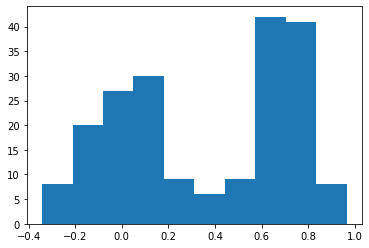

In [5]:
plt.hist(z)

In [6]:
from scipy import stats

In [7]:
kde=stats.gaussian_kde(z)

In [8]:
kde.covariance_factor()

0.3465724215775732

In [9]:
z_g=np.linspace(z.min(),z.max(),1000)

In [10]:
pdf=kde.evaluate(z_g)

(array([0.3060386 , 0.76509649, 1.03288026, 1.14764474, 0.34429342,
        0.22952895, 0.34429342, 1.60670263, 1.5684478 , 0.3060386 ]),
 array([-0.34226762, -0.21156515, -0.08086268,  0.04983979,  0.18054226,
         0.31124473,  0.44194719,  0.57264966,  0.70335213,  0.8340546 ,
         0.96475707]),
 <a list of 10 Patch objects>)

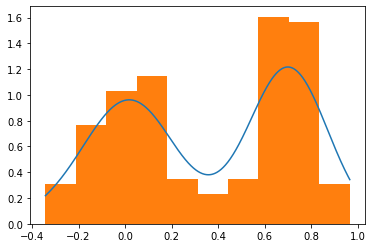

In [12]:
plt.plot(z_g,pdf)
plt.hist(z,density=True)

In [13]:
z_s=(z-z.mean())/(z.std())

0.9999999999999999


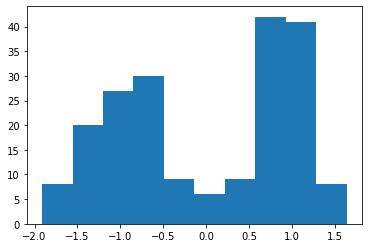

In [14]:
plt.hist(z_s)
print(z_s.std())

In [15]:
kde_s=stats.gaussian_kde(z_s)
kde_s.covariance_factor()

0.3465724215775732

In [16]:
z_gs=np.linspace(z_s.min(),z_s.max(),1000)
pdf_s=kde_s.evaluate(z_gs)

(array([0.11280259, 0.28200647, 0.38070874, 0.42300971, 0.12690291,
        0.08460194, 0.12690291, 0.5922136 , 0.57811327, 0.11280259]),
 array([-1.91093143, -1.55632965, -1.20172786, -0.84712607, -0.49252428,
        -0.13792249,  0.2166793 ,  0.57128108,  0.92588287,  1.28048466,
         1.63508645]),
 <a list of 10 Patch objects>)

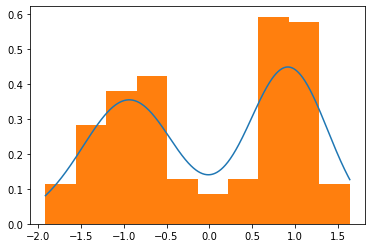

In [17]:
plt.plot(z_gs,pdf_s)
plt.hist(z_s,density=True)

In [18]:
kde_s.covariance_factor()

0.3465724215775732

In [19]:
kde_d=stats.gaussian_kde(z,bw_method=kde_s.covariance_factor())

In [20]:
pdf_d=kde_d.evaluate(z_g)

(array([0.3060386 , 0.76509649, 1.03288026, 1.14764474, 0.34429342,
        0.22952895, 0.34429342, 1.60670263, 1.5684478 , 0.3060386 ]),
 array([-0.34226762, -0.21156515, -0.08086268,  0.04983979,  0.18054226,
         0.31124473,  0.44194719,  0.57264966,  0.70335213,  0.8340546 ,
         0.96475707]),
 <a list of 10 Patch objects>)

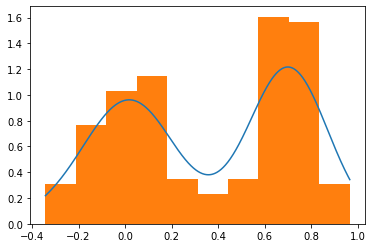

In [21]:
plt.plot(z_g,pdf_d)
plt.hist(z,density=True)

In [22]:
from sklearn.neighbors import KernelDensity

In [23]:
BW_1=0.3465724215775732*z.std()

In [24]:
kde_1d = KernelDensity(bandwidth = BW_1).fit(z[:, None])

In [25]:
pdf_k = np.exp(kde_1d.score_samples(z_g[:, None]))

(array([0.3060386 , 0.76509649, 1.03288026, 1.14764474, 0.34429342,
        0.22952895, 0.34429342, 1.60670263, 1.5684478 , 0.3060386 ]),
 array([-0.34226762, -0.21156515, -0.08086268,  0.04983979,  0.18054226,
         0.31124473,  0.44194719,  0.57264966,  0.70335213,  0.8340546 ,
         0.96475707]),
 <a list of 10 Patch objects>)

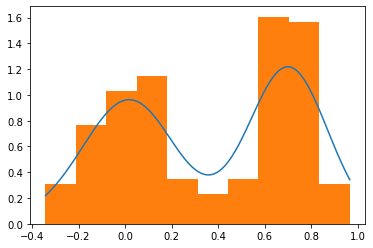

In [26]:
plt.plot(z_g,pdf_k)
plt.hist(z,density=True)

In [27]:
kde_s = KernelDensity(bandwidth = 0.3465).fit(z_s[:, None])
pdf_ks = np.exp(kde_s.score_samples(z_gs[:, None]))

(array([0.11280259, 0.28200647, 0.38070874, 0.42300971, 0.12690291,
        0.08460194, 0.12690291, 0.5922136 , 0.57811327, 0.11280259]),
 array([-1.91093143, -1.55632965, -1.20172786, -0.84712607, -0.49252428,
        -0.13792249,  0.2166793 ,  0.57128108,  0.92588287,  1.28048466,
         1.63508645]),
 <a list of 10 Patch objects>)

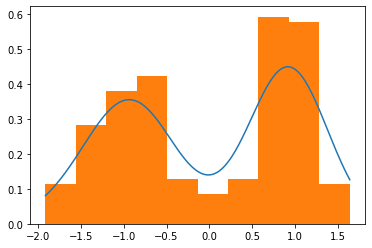

In [28]:
plt.plot(z_gs,pdf_ks)
plt.hist(z_s,density=True)

(array([0.3060386 , 0.76509649, 1.03288026, 1.14764474, 0.34429342,
        0.22952895, 0.34429342, 1.60670263, 1.5684478 , 0.3060386 ]),
 array([-0.34226762, -0.21156515, -0.08086268,  0.04983979,  0.18054226,
         0.31124473,  0.44194719,  0.57264966,  0.70335213,  0.8340546 ,
         0.96475707]),
 <a list of 10 Patch objects>)

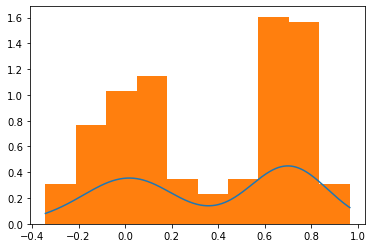

In [29]:
plt.plot(z_g,pdf_ks)
plt.hist(z,density=True)

## 2D

In [30]:
z_g=np.linspace(z.min(),z.max(),30)
z_g2=np.linspace(z2.min(),z2.max(),50)

In [31]:
z_g3=np.linspace(z3.min(),z3.max(),100)

In [32]:
z_s=(z-z.mean())/(z.std())
z2_s=(z2-z2.mean())/(z2.std())

In [33]:
data_example = np.vstack([z_s, z2_s]).T

In [34]:
kde_example = KernelDensity(bandwidth=0.34).fit(data_example)

In [35]:
z_gs=np.linspace(z_s.min(),z_s.max(),30)
z_gs2=np.linspace(z2_s.min(),z2_s.max(),50)

In [36]:
X, Y = np.meshgrid(z_gs, z_gs2)
xy = np.vstack([X.ravel(), Y.ravel()]).T

In [37]:
data_example.shape

(200, 2)

In [38]:
pdf=np.exp(kde_example.score_samples(xy))

In [39]:
pdf=pdf.reshape(50,30)

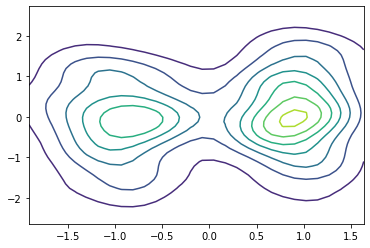

In [40]:
plt.contour(X,Y,pdf)

In [41]:
z_s=(z-z.mean())/(z.std())
z2_s=(z2-z2.mean())/(z2.std())
z3_s=(z3-z3.mean())/(z3.std())

In [42]:
z_gs=np.linspace(z_s.min(),z_s.max(),30)
z_gs2=np.linspace(z2_s.min(),z2_s.max(),50)
z_gs3=np.linspace(z3_s.min(),z3_s.max(),100)

In [43]:
data_example = np.vstack([z_s, z2_s,z3_s]).T

In [44]:
kde_example = KernelDensity(bandwidth=0.34).fit(data_example)

In [45]:
X, Y, Z = np.meshgrid(z_gs, z_gs2,z_gs3)
xyz = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T

In [46]:
pdf=np.exp(kde_example.score_samples(xyz))

In [47]:
pdf=pdf.reshape(50,30,100)

In [48]:
Xp, Yp, = np.meshgrid(z_gs, z_gs2)

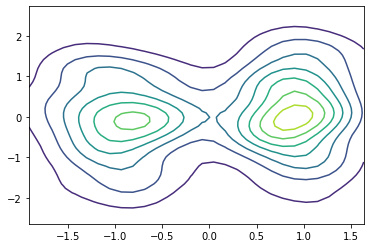

In [49]:
plt.contour(Xp,Yp,pdf.sum(axis=2))

In [50]:
Xo, Yo = np.meshgrid(z_g, z_g2)

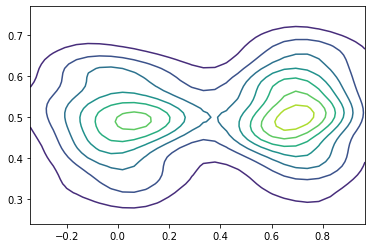

In [51]:
plt.contour(Xo,Yo,pdf.sum(axis=2))

In [52]:
priory = stats.norm.pdf(z_g2,0.55,0.005)

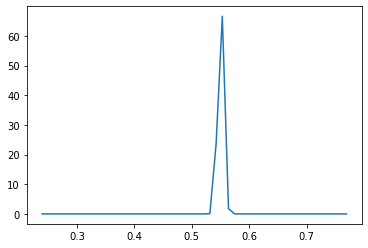

In [53]:
plt.plot(z_g2,priory)

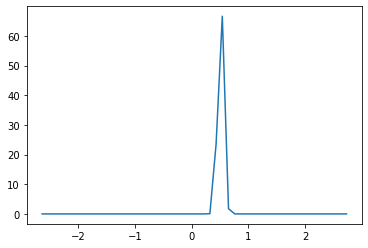

In [54]:
plt.plot(z_gs2,priory)

In [55]:
priorx = stats.norm.pdf(z_g,0.65,0.05)

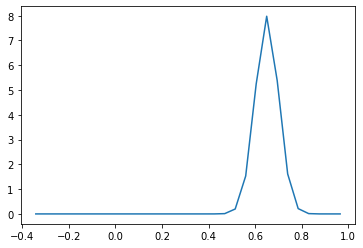

In [56]:
plt.plot(z_g,priorx)

In [57]:
pr2d=((np.ones([50,30]).T*priory).T)*priorx

In [58]:
norm_pr=(pr2d.sum(axis=0)*(z_gs[1]-z_gs[0])).sum()*(z_gs2[1]-z_gs2[0])

In [59]:
pr2d=pr2d/norm_pr

In [60]:
z_g2=np.linspace(z2.min(),z2.max(),50)

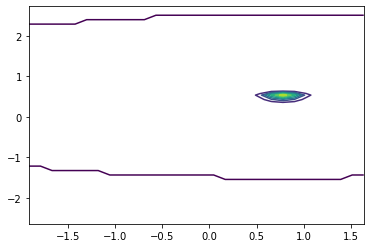

In [61]:
plt.contour(Xp,Yp,pr2d)

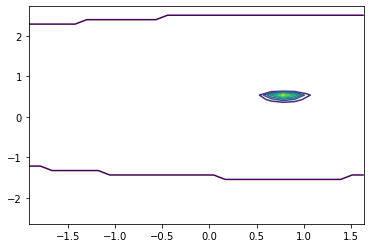

In [62]:
plt.contour(Xp,Yp,pr2d*pdf.sum(axis=2))

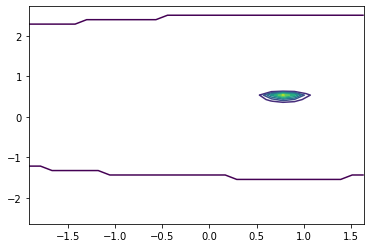

In [63]:
plt.contour(Xp,Yp,((pdf.T*pr2d.T).T).sum(axis=2))

In [64]:
post=(((pdf.T*pr2d.T).T).sum(axis=0)).sum(axis=0)

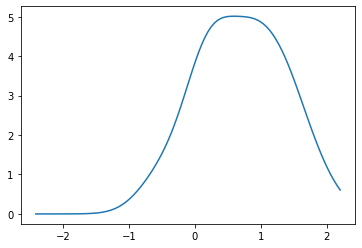

In [65]:
plt.plot(z_gs3,post)

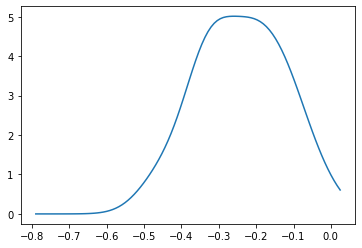

In [66]:
plt.plot(z_g3,post)

In [67]:
prior.sum()*(z_g2[1]-z_g2[0])

NameError: name 'prior' is not defined

In [ ]:
pdf*prior

In [68]:
plt.contour(X,Y,(pdf.T*prior).T)

NameError: name 'prior' is not defined

In [69]:
matrix=(pdf.T*prior).T

NameError: name 'prior' is not defined

In [70]:
post=matrix.sum(axis=0)

NameError: name 'matrix' is not defined

ValueError: x and y must have same first dimension, but have shapes (30,) and (100,)

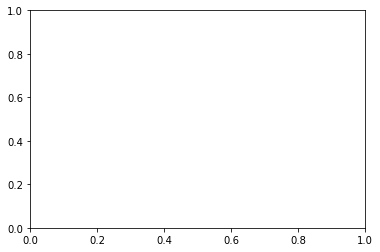

In [71]:
plt.plot(z_gs,post)

In [ ]:
plt.plot(z_g,post)

In [ ]:
post.sum()*(z_g[1]-z_g[0])